# Prophetのモデルの中身
Prophetがどのようにしてモデルを作成しているのか、もう少し詳細に見てみます。

```{admonition} 参考文献
Taylor, Sean J., and Benjamin Letham. "Forecasting at scale." The American Statistician 72.1 (2018): 37-45.
```

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib
    !pip install prophet

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
from prophet import Prophet

In [3]:
# グラフの表示パラメタ
sns.set(
    rc={
        "figure.figsize": (12, 4),
        "legend.fontsize": "large",
        "figure.titlesize": "large",
        "axes.titlesize": 20,
    }
)
japanize_matplotlib.japanize()
np.random.seed(777)

## 実験に使用するデータ
１年間のデータを用意します。このデータには以下の特徴があります。

- 2020/1/1 ~ 2020/12/31 の期間のデータ
- 週ごとに周期的な数値を取る
- 土日は大きな値をとる
- 不定期にイベントが発生し、その時は非常に大きな値を取る(`horidays_index`に該当する日付を指しています)

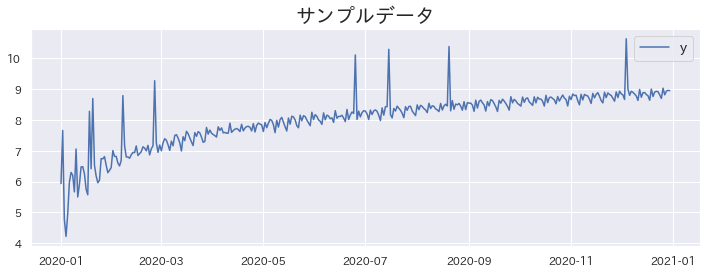

In [4]:
date = pd.date_range("2020-01-01", periods=365, freq="D")
horidays_index = random.sample([i for i in range(365)], 10)
y = [
    np.log(10 + i + 10 * np.cos(i))  # トレンド
    + np.cos(di.weekday() * np.pi / 28) * 3  # 週ごとに周期性あり
    + (di.weekday() in {5, 6}) * 0.5  #       〃
    + (i in horidays_index) * 2  # 祝日だけ数値を増やす
    + np.random.rand() / 10  # ノイズ
    for i, di in enumerate(date)
]

df = pd.DataFrame({"ds": date, "y": y})
df.index = date

plt.title("サンプルデータ")
sns.lineplot(data=df)
plt.show()

## トレンドの指定
以下の例では**黒丸が実際のデータ**。青線がprophetのモデルの予測となっています。

### growth="linear"

Initial log joint probability = -2.9062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1043.79   0.000883979       83.7268      0.4802      0.4802      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       1044.24   0.000888188       180.351   1.769e-05       0.001      211  LS failed, Hessian reset 
     159       1044.47   0.000252965       96.8412   3.415e-06       0.001      291  LS failed, Hessian reset 
     199       1044.52   4.72423e-06       53.9243           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       1044.52   4.84298e-05       65.2702   8.739e-07       0.001      408  LS failed, Hessian reset 
     237       1044.52   2.49312e-07       51.5728   4.833e-09       0.001      484  LS failed, Hessian reset 
     238       1044.52   1.09266e-07       43.8638           1    

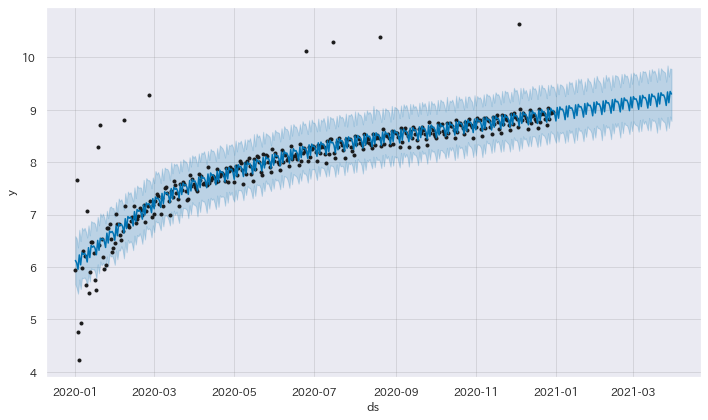

In [5]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

### growth="flat"

Initial log joint probability = -3.15362
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
       8       745.961   0.000148129     0.0616722      0.9986      0.9986       14   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


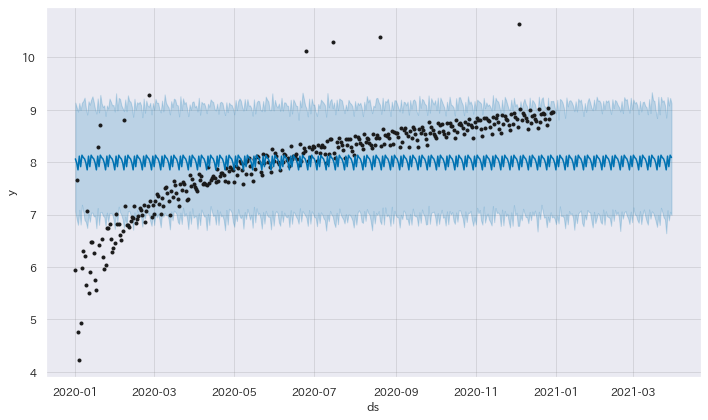

In [6]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="flat",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

## 季節変化の指定
### seasonalityが全てFalse

Initial log joint probability = -2.9062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       1031.03    0.00169604       129.352   1.615e-05       0.001      155  LS failed, Hessian reset 
      99       1031.63   0.000469531       55.9163      0.2707           1      174   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       1032.48   0.000246491       71.9416   4.036e-06       0.001      299  LS failed, Hessian reset 
     199       1032.51   1.44266e-05       46.9272      0.5445      0.5445      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       1032.52    9.0738e-08       52.7824       0.349           1      457   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


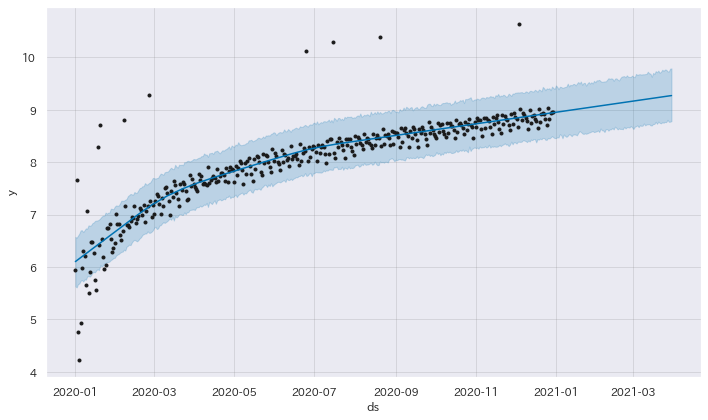

In [7]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

### weekly_seasonality=True

Initial log joint probability = -2.9062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1043.79   0.000883979       83.7268      0.4802      0.4802      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       1044.24   0.000888188       180.351   1.769e-05       0.001      211  LS failed, Hessian reset 
     159       1044.47   0.000252965       96.8412   3.415e-06       0.001      291  LS failed, Hessian reset 
     199       1044.52   4.72423e-06       53.9243           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       1044.52   4.84298e-05       65.2702   8.739e-07       0.001      408  LS failed, Hessian reset 
     237       1044.52   2.49312e-07       51.5728   4.833e-09       0.001      484  LS failed, Hessian reset 
     238       1044.52   1.09266e-07       43.8638           1    

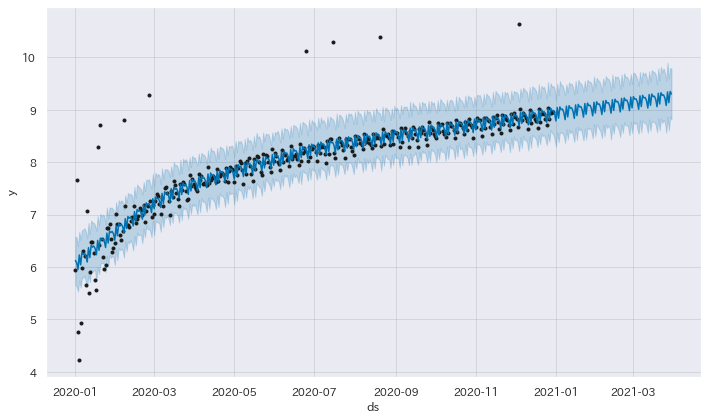

In [8]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

### yearly_seasonality=True

Initial log joint probability = -2.9062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1064.71   5.45993e-07       99.2124      0.7179      0.7179      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     130       1064.72   4.40388e-06       100.739   4.124e-08       0.001      226  LS failed, Hessian reset 
     155       1064.72   1.23996e-08       100.329      0.2353           1      259   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


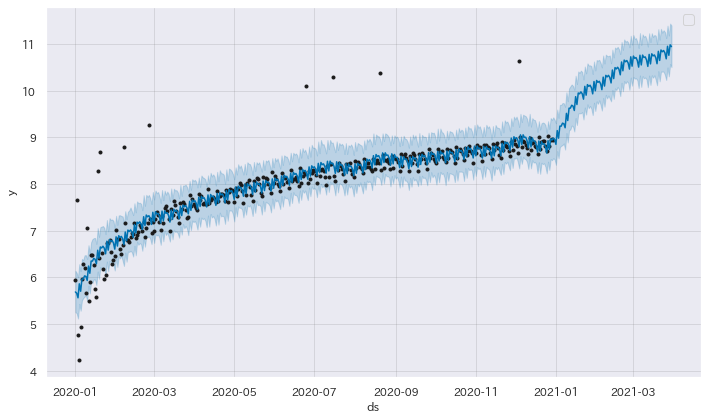

In [9]:
# モデルを作成
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    growth="linear",
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.legend()
plt.show()

## 休日・イベント効果
### 休日・イベントの指定なし(`holidays=None`)

Initial log joint probability = -2.9062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1043.79   0.000883979       83.7268      0.4802      0.4802      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       1044.24   0.000888188       180.351   1.769e-05       0.001      211  LS failed, Hessian reset 
     159       1044.47   0.000252965       96.8412   3.415e-06       0.001      291  LS failed, Hessian reset 
     199       1044.52   4.72423e-06       53.9243           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       1044.52   4.84298e-05       65.2702   8.739e-07       0.001      408  LS failed, Hessian reset 
     237       1044.52   2.49312e-07       51.5728   4.833e-09       0.001      484  LS failed, Hessian reset 
     238       1044.52   1.09266e-07       43.8638           1    

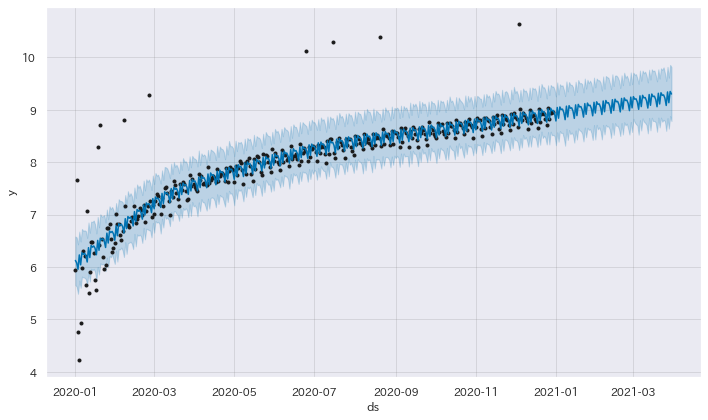

In [10]:
# モデルを作成
m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
    holidays=None,  # 休日・イベントの指定なし
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

### 休日・イベントの指定あり

Initial log joint probability = -2.9062
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1343.72    0.00552858        490.35      0.4758      0.4758      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1367.85   0.000347169       190.308           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1378.89   0.000252138       413.615      0.2003      0.2003      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       1379.79   1.12259e-05       21.5979   1.447e-07       0.001      498  LS failed, Hessian reset 
     389       1380.03   5.67708e-05       125.299   7.555e-07       0.001      582  LS failed, Hessian reset 
     399       1380.06   0.000268049       41.4995           1           1      593   
    Iter      log prob

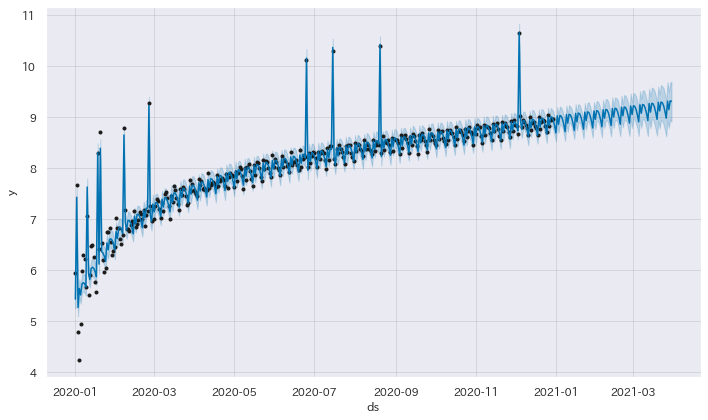

In [11]:
# モデルを作成
df_holidays = pd.DataFrame(
    {"holiday": "event", "ds": [di for i, di in enumerate(date) if i in horidays_index]}
)

m = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    growth="linear",
    holidays=df_holidays,  # 休日・イベントの指定あり
)
m.fit(df)

# 将来を予測
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()